# KNN
`Scikit-learn` is a very popular Machine Learning library for Python.  
In this tutorial, let us use it to build a machine learning model using k-Nearest Neighbors algorithm to predict whether the patients in the **Pima Indians Diabetes Dataset** have diabetes or not.  

We have 8 features:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

And out target is:  
* Outcome (onset of diabetes as 1 or not as 0)

In [61]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [62]:
from google.colab import files 
uploaded_files = files.upload() # upload file
import io
data = io.BytesIO(uploaded_files['diabetes.csv']) # read file


Saving diabetes.csv to diabetes (2).csv


In [63]:
#Load the dataset
df = pd.read_csv(data)
#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

As observed above we have 768 rows and 9 columns.  
The first 8 columns represent the features and the last column represent the target/label (1: diabetic, 0: non-diabetic). 

In [65]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

Let's split the data randomly into training and test set. 

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using `train_test_split` method.

In [66]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split of dataset in such a way that it maintains the same ratio of classes in our test and train dataset.So we use the stratify argument.

Also we create a test set of size of about 40% of the dataset.

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,stratify=y,random_state=42)

Let's create a classifier using k-Nearest Neighbors algorithm.

First, let us observe the accuracies for different values of k.

In [68]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test,y_test)
    

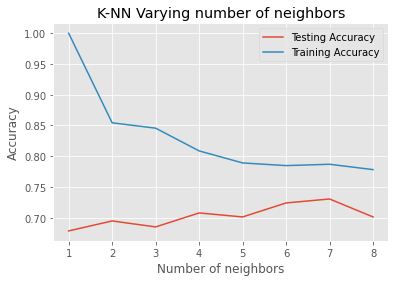

In [69]:
#Generate plot
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.show()

We can observe above that we get maximum testing accuracy for k=7. So let's create a `KNeighborsClassifier` with number of neighbors as `7`.

In [91]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [92]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [72]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7305194805194806

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the `confusion_matrix` method.

In [73]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [74]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [75]:
#print confusion matrix
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

Considering confusion matrix above:

True negative = 165

False positive = 36

True postive = 60

Fasle negative = 47

Confusion matrix can also be obtained using `crosstab` method of `pandas`.

In [76]:
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,165,36,201
1,47,60,107
All,212,96,308


**Classification Report**

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. `Scikit-learn` provides facility to calculate Classification report using the `classification_report` method.

<center>

|                     | **predicted negative** | **predictive positive** |
| ------------------- |:----------------------:|:-----------------------:|
| **actual negative** | true negative          | false positive          |
| **actual positive** | false negative         | true positive           |

</center>

**1. Precision**

$$precision = \frac{true\ positive}{true\ positive + false\ positive} = \frac{true\ positive}{total\ predicted\ positive}$$

Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.

Precision is a good measure to determine, when the **costs of False Positive is high**. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

**2. Recall**

$$recall = \frac{true\ positive}{true\ positive + false\ negative} = \frac{true\ positive}{total\ actual\ positive}$$

Recall calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).  
Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a **high cost associated with False Negative**.  

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

**3. F1 Score**

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

F1 Score is needed when you want to seek a balance between Precision and Recall.  

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an **uneven class distribution** (large number of Actual Negatives).

<center>

| Degree of imbalance | Proportion of minority class |
| ------------------- | ---------------------------- |
| Mild                | 20-40% of the dataset        |
| Moderate            | 1-20% of the dataset         |
| Extreme             | \< 1% of the dataset         |

</center>

<br/>

> References: [This google course](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) and [this article](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9).

In [77]:
#import classification_report
from sklearn.metrics import classification_report

In [78]:
# generate and print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



We have **precision**, **recall**, **f1-score** and **support** for each class.

* The **recall** means "how many of this class we find over the whole number of element of this class".
* The **precision** will be "how many are correctly classified among that class".
* The **f1-score** is the harmonic mean between precision & recall.
* The **support** is the number of occurence of the given class in the dataset (so we have 201 of class 0 and 107 of class 1).

Precision and recall is highly used for **imbalanced dataset** because in an highly imbalanced dataset, a 99% accuracy can be meaningless.

Observation:  
* classifier finding onset of diabetes (1) $<<$ classifier finding no onset of diabetes (0)  
* In other words, classifier is better at finding no onset of diabetes.

> Reference: [this Q&A](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

**ROC (Reciever Operating Charecteristic) curve**

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

$$ true\ positive\ rate = \frac{true\ positive}{true\ positive + false\ negative} = sensitivity = recall $$

$$ false\ positive\ rate = \frac{false\ positive}{false\ positive + true\ negative} = 1 - specificity $$

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

<center>

![different ROC](https://miro.medium.com/max/576/1*MIQXB9LDkPoHunwEXOa8Cg.png)

</center>

4) The area under the curve is a measure of test accuracy.

> [This video](https://www.youtube.com/watch?v=4jRBRDbJemM) explains ROC very clearly and simply.

In [96]:
# calulculate probability estimates of the test data and only keep those of class 1
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [80]:
from sklearn.metrics import roc_curve

In [81]:
# get the false positive rate and the true positive rate
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

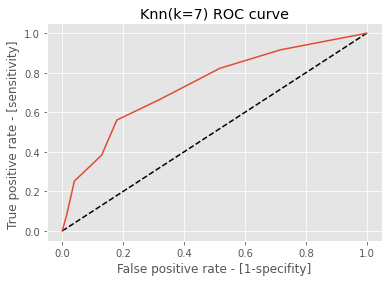

In [82]:
# plot the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('False positive rate - [1-specifity]')
plt.ylabel('True positive rate - [sensitivity] ')
plt.title('Knn(k=7) ROC curve')
plt.show()

In [83]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7345050448691124

When and why we use ROC and AUC: 

* For single model: to find the best threshold for our purposes.
* Comparing models: to find the best model given AUC or at a certain threshold given our desired tpr and fpr.


**Cross Validation**

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

**Hyperparameter tuning**

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning. 

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.



In [84]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [85]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [86]:
# create a knn classifier instance
knn = KNeighborsClassifier()

# create an instance of a grid search that has:
# - a knn model
# - grid parameter that specifies the number of neighbors we want to search
# - 5 folds for the cross validation
knn_cv = GridSearchCV(knn,param_grid,cv=5)

# use the features and the target to search the grid
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [87]:
# print the best score
knn_cv.best_score_

0.7578558696205755

In [88]:
# print the paramter associated with the best score
knn_cv.best_params_

{'n_neighbors': 14}